# 2.4.0 Evaluating hyperparameters - Random forests

### The following script contains the following:

#### 1. Import data libraries, additional requirements
#### 2. File directory, read the data
#### 3. Load and split data in training/test sets
#### 4. Grid search cv
#### 5. Random search cv
#### 6. Create random forest classifier
#### 7. Conduct feature importances analysis
        
---------------------------------------------------------------------------------------------------------------------------
## 1. Import data libraries, additional requirements
---------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Auto-call show plots
%matplotlib inline

# Turning off warning feature
import warnings
warnings.filterwarnings('ignore')

# Set display options to show all columns
pd.set_option('display.max_columns', None)

---------------------------------------------------------------------------------------------------------------------------
## 2. File directory, read the data

In [3]:
path = r'climatewins-ml'

In [4]:
X = pd.read_csv(os.path.join(path, '02 Data Sets', 'Unsupervised', 'weather-cleaned-last-decade.csv'))
X

BASEL_cloud_cover  BASEL_global_radiation  BASEL_humidity  \
0                     8                    0.20            0.89   
1                     8                    0.25            0.87   
2                     5                    0.50            0.81   
3                     7                    0.63            0.79   
4                     5                    0.51            0.90   
...                 ...                     ...             ...   
4013                  7                    0.45            0.80   
4014                  8                    0.22            0.86   
4015                  8                    0.20            0.97   
4016                  8                    0.13            1.00   
4017                  8                    0.13            1.00   

      BASEL_precipitation  BASEL_pressure  BASEL_sunshine  BASEL_temp_max  \
0                    0.03          1.0286             0.0             3.9   
1                    0.00          1.0318             0.0             4.8   
2                    0.00          1.0314             3.7             4.8   
3                    0.35          1.0262             6.9             7.5   
4                    0.07          1.0246             3.7             8.6   
...                   ...             ...             ...             ...   
4013                 0.00          1.0262             2.0            -2.4   
4014                 0.08          1.0226             0.0             0.3   
4015                 0.00          1.0232             0.0             2.0   
4016                 0.00          1.0242             0.0             0.6   
4017                 0.00          1.0251             0.0             0.9   

      BASEL_temp_mean  BASEL_temp_min  BELGRADE_cloud_cover  \
0                 2.9             1.6                     7   
1                 3.6             2.7                     8   
2                 2.2             0.1                     5   
3                 3.9             0.5                     7   
4                 6.0             3.8                     7   
...               ...             ...                   ...   
4013             -6.0           -10.8                     8   
4014             -1.8            -3.8                     3   
4015              0.7            -0.1                     5   
4016              0.0            -0.4                     8   
4017              0.1            -0.5                     7   

      BELGRADE_global_radiation  BELGRADE_humidity  BELGRADE_precipitation  \
0                          0.24               0.88                    0.00   
1                          0.25               0.85                    0.00   
2                          0.50               0.84                    0.00   
3                          0.35               0.94                    0.00   
4                          0.30               0.95                    0.00   
...                         ...                ...                     ...   
4013                       0.24               0.89                    0.16   
4014                       0.59               0.77                    0.00   
4015                       0.69               0.91                    0.00   
4016                       0.24               0.91                    0.00   
4017                       0.24               0.90                    0.00   

      BELGRADE_pressure  BELGRADE_sunshine  BELGRADE_temp_max  \
0                1.0275                0.0               -0.4   
1                1.0303                0.0               -0.3   
2                1.0310                1.4                1.4   
3                1.0258                0.3               -0.3   
4                1.0254                0.1                0.4   
...                 ...                ...                ...   
4013             1.0238                0.0               -2.4   
4014             1.0252                2.6               -0.6 

In [5]:
y = pd.read_csv(os.path.join(path, '02 Data Sets', 'Unsupervised', 'outcomes-cleaned-last-decade.csv'))
y

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   
...                      ...                        ...   
4013                       0                          0   
4014                       0                          0   
4015                       0                          0   
4016                       0                          0   
4017                       0                          0   

      BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
4013                          0                        0   
4014                          0                        0   
4015                          0                        0   
4016                          0                        0   
4017                          0                        0   

      DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   
...                           ...                        ...   
4013                            0                          0   
4014                            0                          0   
4015                            0                          0   
4016                            0                          0   
4017                            0                          0   

      KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
...                       ...                         ...   
4013                        0                           0   
4014                        0                           0   
4015                        0                           0   
4016                        0                           0   
4017                        0                           0   

      MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               0                        0   
4                               0                        0   
...                           ...                      ...   
4013                            0                        0   
4014                            0                        0   
4015                            0                        0   
4016                            0                        0   
4017                            0                        0   

      MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                             0                      0   
1                             0                      0   
2                             0                      0   
3                             0                      0   
4                             0        

---------------------------------------------------------------------------------------------------------------------------
## 3. Load and split data in training/test sets

In [6]:
# List of weather stations prefixes;
weather = [
    'BASEL_',
    'BELGRADE_',
    'BUDAPEST_',
    'DEBILT_',
    'DUSSELDORF_',
    'HEATHROW_',
    'KASSEL_',
    'LJUBLJANA_',
    'MAASTRICHT_',
    'MADRID_',
    'MUNCHENB_',
    'OSLO_',
    'SONNBLICK_',
    'STOCKHOLM_',
    'VALENTIA_'
]

In [31]:
# Dictionary mapping outcomes to weather stations for confusion matrix;
weather_outcomes = [
    'BASEL_pleasant_weather',
    'BELGRADE_pleasant_weather',
    'BUDAPEST_pleasant_weather',
    'DEBILT_pleasant_weather',
    'DUSSELDORF_pleasant_weather',
    'HEATHROW_pleasant_weather',
    'KASSEL_pleasant_weather',
    'LJUBLJANA_pleasant_weather',
    'MAASTRICHT_pleasant_weather',
    'MADRID_pleasant_weather',
    'MUNCHENB_pleasant_weather',
    'OSLO_pleasant_weather',
    'SONNBLICK_pleasant_weather',
    'STOCKHOLM_pleasant_weather',
    'VALENTIA_pleasant_weather'
]

In [8]:
# Load data, process it, and format it appropriately for training a machine learning model.

In [9]:
# Reshape df;
#X = decade.values.reshape(-1, 15, 9)

# Ensure the labels are in the same shape as X;
#y = outcomes.values.reshape(-1, 15)

def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [10]:
X.shape

(4018, 135)

In [11]:
y.shape

(4018, 15)

In [12]:
# Split the data into training and testing sets;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3214, 135) (3214, 15)
(804, 135) (804, 15)


In [14]:
# Reshape X_train
#X_train = X_train.values.reshape(-1, 15) #-1 means "whatever works"
print(X_train.shape)
X_train

(3214, 135)


BASEL_cloud_cover  BASEL_global_radiation  BASEL_humidity  \
3613                  6                    0.12            0.77   
2661                  0                    2.59            0.53   
3290                  5                    0.50            0.72   
1075                  7                    0.40            0.83   
3249                  6                    0.47            0.74   
...                 ...                     ...             ...   
1130                  8                    0.37            0.88   
1294                  3                    3.25            0.54   
860                   3                    3.03            0.67   
3507                  8                    0.41            0.89   
3174                  3                    2.19            0.68   

      BASEL_precipitation  BASEL_pressure  BASEL_sunshine  BASEL_temp_max  \
3613                 0.11          1.0202             0.0            12.7   
2661                 0.00          1.0193            12.3            26.2   
3290                 0.00          1.0263             2.9            -1.8   
1075                 0.00          1.0223             0.8            -0.5   
3249                 0.71          1.0079             0.7             2.6   
...                   ...             ...             ...             ...   
1130                 1.45          0.9978             0.7             3.7   
1294                 0.00          1.0219            13.3            28.4   
860                  0.00          1.0090            11.6            22.2   
3507                 3.35          1.0173             0.1            21.1   
3174                 0.00          1.0173             9.7            26.5   

      BASEL_temp_mean  BASEL_temp_min  BELGRADE_cloud_cover  \
3613              8.9             5.0                     5   
2661             18.6            10.3                     0   
3290             -3.1            -6.2                     5   
1075             -1.9            -2.6                     8   
3249              0.8            -0.8                     2   
...               ...             ...                   ...   
1130              0.4            -2.1                     7   
1294             21.9            14.0                     7   
860              15.2             9.2                     6   
3507             19.7            17.4                     3   
3174             18.7            10.5                     0   

      BELGRADE_global_radiation  BELGRADE_humidity  BELGRADE_precipitation  \
3613                       0.70               0.90                    0.00   
2661                       2.77               0.43                    0.00   
3290                       0.64               0.78                    0.00   
1075                       0.24               0.67                    0.00   
3249                       0.94               0.52                    0.00   
...                         ...                ...                     ...   
1130                       0.34               0.63                    1.08   
1294                       1.06               0.87                    0.50   
860                        2.21               0.55                    0.12   
3507                       2.69               0.77                    0.00   
3174                       2.48               0.52                    0.00   

      BELGRADE_pressure  BELGRADE_sunshine  BELGRADE_temp_max  \
3613             1.0221                3.4               11.7   
2661             1.0207               12.0               22.3   
3290             1.0269                3.1               -0.8   
1075             1.0330                0.0               -2.9   
3249             1.0073                6.8                6.0   
...                 ...                ...                ...   
1130             0.9930                0.0                5.4   
1294             1.0173                0.7               26.4 

In [15]:
y_train

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
3613                       0                          0   
2661                       1                          1   
3290                       0                          0   
1075                       0                          0   
3249                       0                          0   
...                      ...                        ...   
1130                       0                          0   
1294                       1                          0   
860                        1                          0   
3507                       0                          1   
3174                       1                          1   

      BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
3613                          0                        0   
2661                          1                        1   
3290                          0                        0   
1075                          0                        0   
3249                          0                        0   
...                         ...                      ...   
1130                          0                        0   
1294                          0                        0   
860                           0                        0   
3507                          1                        1   
3174                          1                        0   

      DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
3613                            0                          0   
2661                            1                          1   
3290                            0                          0   
1075                            0                          0   
3249                            0                          0   
...                           ...                        ...   
1130                            0                          0   
1294                            1                          1   
860                             0                          0   
3507                            0                          1   
3174                            0                          0   

      KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
3613                        0                           0   
2661                        1                           1   
3290                        0                           0   
1075                        0                           0   
3249                        0                           0   
...                       ...                         ...   
1130                        0                           0   
1294                        1                           1   
860                         0                           1   
3507                        0                           1   
3174                        0                           1   

      MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
3613                            0                        0   
2661                            1                        0   
3290                            0                        0   
1075                            0                        0   
3249                            0                        0   
...                           ...                      ...   
1130                            0                        0   
1294                            1                        1   
860                             0                        0   
3507                            1                        1   
3174                            1                        0   

      MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
3613                          0                      0   
2661                          1                      1   
3290                          0                      0   
1075                          0                      0   
3249                          0        

In [16]:
#Use argmax to get rid of one-hot encoding and supply the numerical value.
y_train = np.argmax(y_train, axis = 1)
print(y_train.shape)
y_train

(3214,)


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

---------------------------------------------------------------------------------------------------------------------------

In [17]:
#The X shape needs to be (804, -1);
X_test = X_test.values.reshape(804, -1) #-1 means "whatever works"
print(X_test.shape)
X_test

(804, 135)


array([[ 8.  ,  0.18,  0.92, ...,  8.9 ,  6.3 ,  3.7 ],
       [ 0.  ,  2.61,  0.48, ..., 14.1 , 12.4 , 10.6 ],
       [ 7.  ,  1.51,  0.84, ..., 18.2 , 16.4 , 14.5 ],
       ...,
       [ 8.  ,  1.03,  0.86, ..., 13.2 ,  9.5 ,  5.8 ],
       [ 5.  ,  2.43,  0.48, ..., 11.7 ,  8.8 ,  5.9 ],
       [ 5.  ,  1.48,  0.69, ...,  8.8 ,  8.  ,  4.9 ]])

In [18]:
y_test = np.argmax(y_test, axis = 1)
print(y_test.shape)
y_test

(804,)


array([ 0,  0,  2,  0,  9,  9,  0,  0,  9,  0,  0,  0,  0,  1,  2,  0,  1,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  9,
        0,  1,  0,  0,  5,  0,  0,  7,  1,  0,  0,  0,  1, 14,  6,  9,  1,
        0,  0,  0,  0,  1, 10,  1,  0,  0,  0,  0,  0,  9,  2,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  1,  3,  0,  1,  9,  1,  9,  1,  0,  1,  0,
        0,  0,  0,  0,  9,  0,  9,  1,  1,  0,  1,  0,  1,  1,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  2,  1,  0,  0,  0,  1,  0,  1,  0,  0,  9,
        0,  9,  0,  1,  0,  0,  3,  0,  1,  0,  1,  0,  0,  0,  0,  0,  9,
        0,  5,  0,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  0,  0,  1,  0,
        9,  0,  0,  1,  0,  9,  0,  1,  0,  0,  0,  0,  0,  9,  0,  0,  0,
        0,  0,  1,  0,  0,  2,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,
        2,  0,  9,  9,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  5,
        1,  1,  1,  0,  0,  1,  0,  9,  0,  0,  0,  1,  9,  9,  6,  9,  0,
        0,  0,  0,  1,  0

---------------------------------------------------------------------------------------------------------------------------
## 4. GridsearchCV

In [19]:
# creating a RF classifier
clf = RandomForestClassifier()

In [20]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200], #add up to 500 estimators [300, 400, 500] took 21 min only 1% higher accuracy
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3] #add split of [4]
           }

In [21]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Search took 3.0953783790270486 minutes


In [22]:
# Grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 0.8559388514941633


---------------------------------------------------------------------------------------------------------------------------
## 5. RandomizedsearchCV

In [23]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [24]:
# Creating a RF classifier
clf2= RandomForestClassifier()

In [25]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 6.901305731137594 minutes


In [26]:
# Random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 50, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 210}
Best RANDOM search score is: 0.8497187846946407


In [27]:
# Grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))
# Random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 0.8559388514941633
Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 50, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 210}
Best RANDOM search score is: 0.8497187846946407


- **notes:** Relatively similar but lower score than our original hyperparameters, we can adjust the grid and randomized search hyperparameters in order to possibly score a higher accuracy than the original CNN model 'clf = RandomForestClassifier'

---------------------------------------------------------------------------------------------------------------------------
## 6. Create random forest classifier

In [28]:
# Creating a RF classifier with the best results from above
#clf = RandomForestClassifier(n_estimators = 100) #original hyperparameters at 88%
clf3 = RandomForestClassifier(n_estimators = 200, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=3)


# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_features=7, min_samples_split=3, n_estimators=200)

In [29]:
# performing predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.8507462686567164


- **Notes:** As predicted, a relatively similar but lower prediction accuracy of approx. 85% rather than the original accuracy of 88%

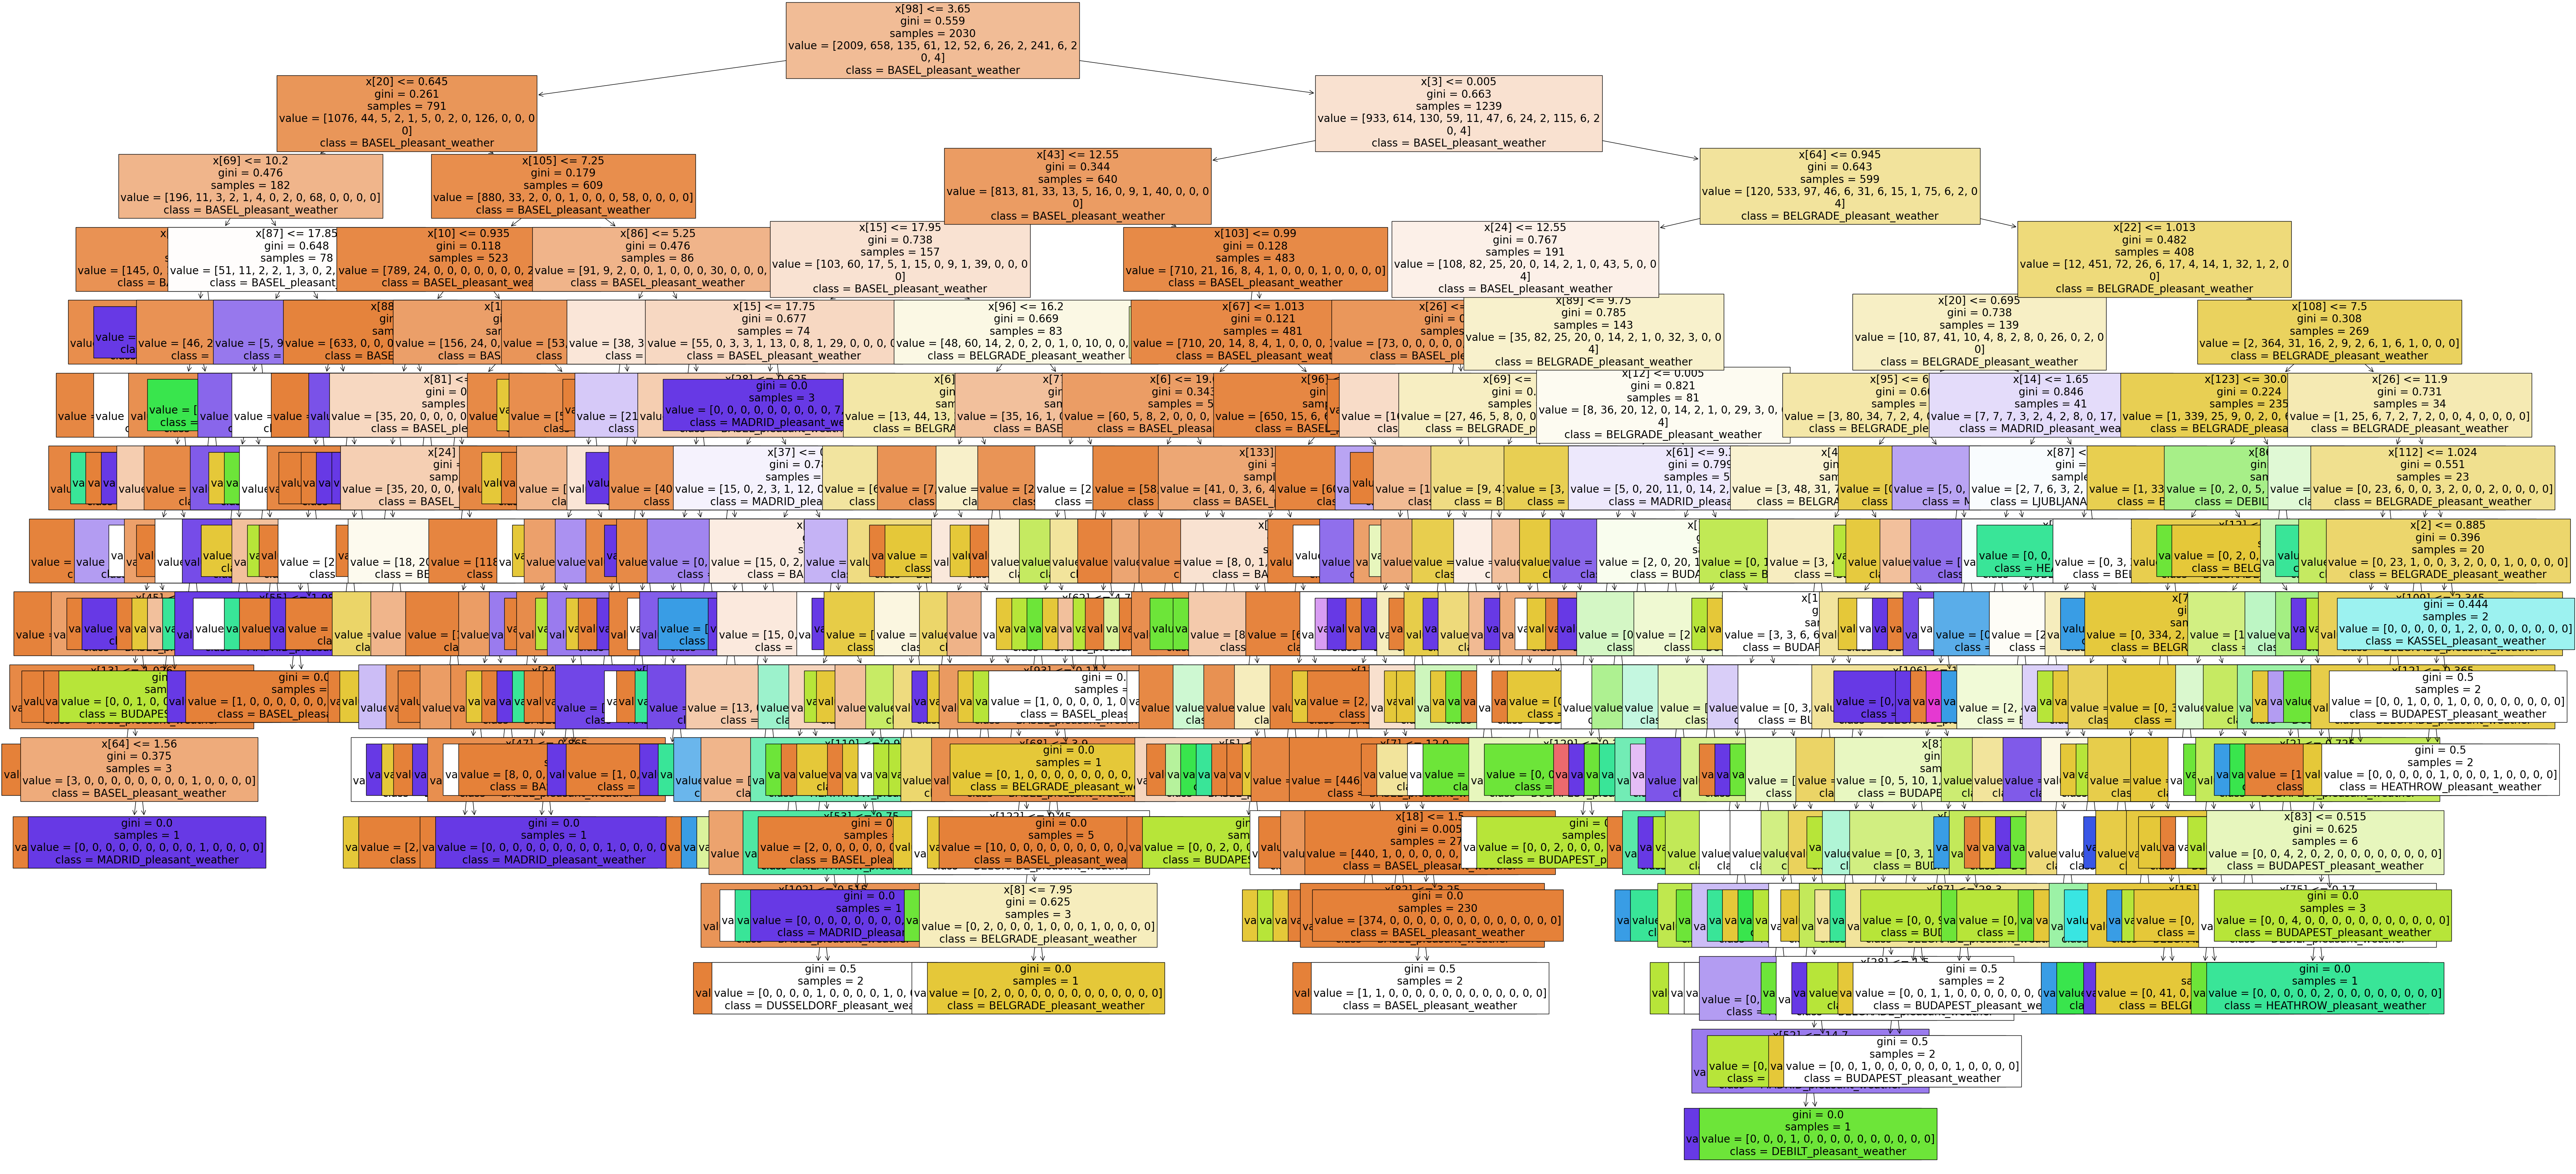

In [32]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, class_names=weather_outcomes, filled=True);

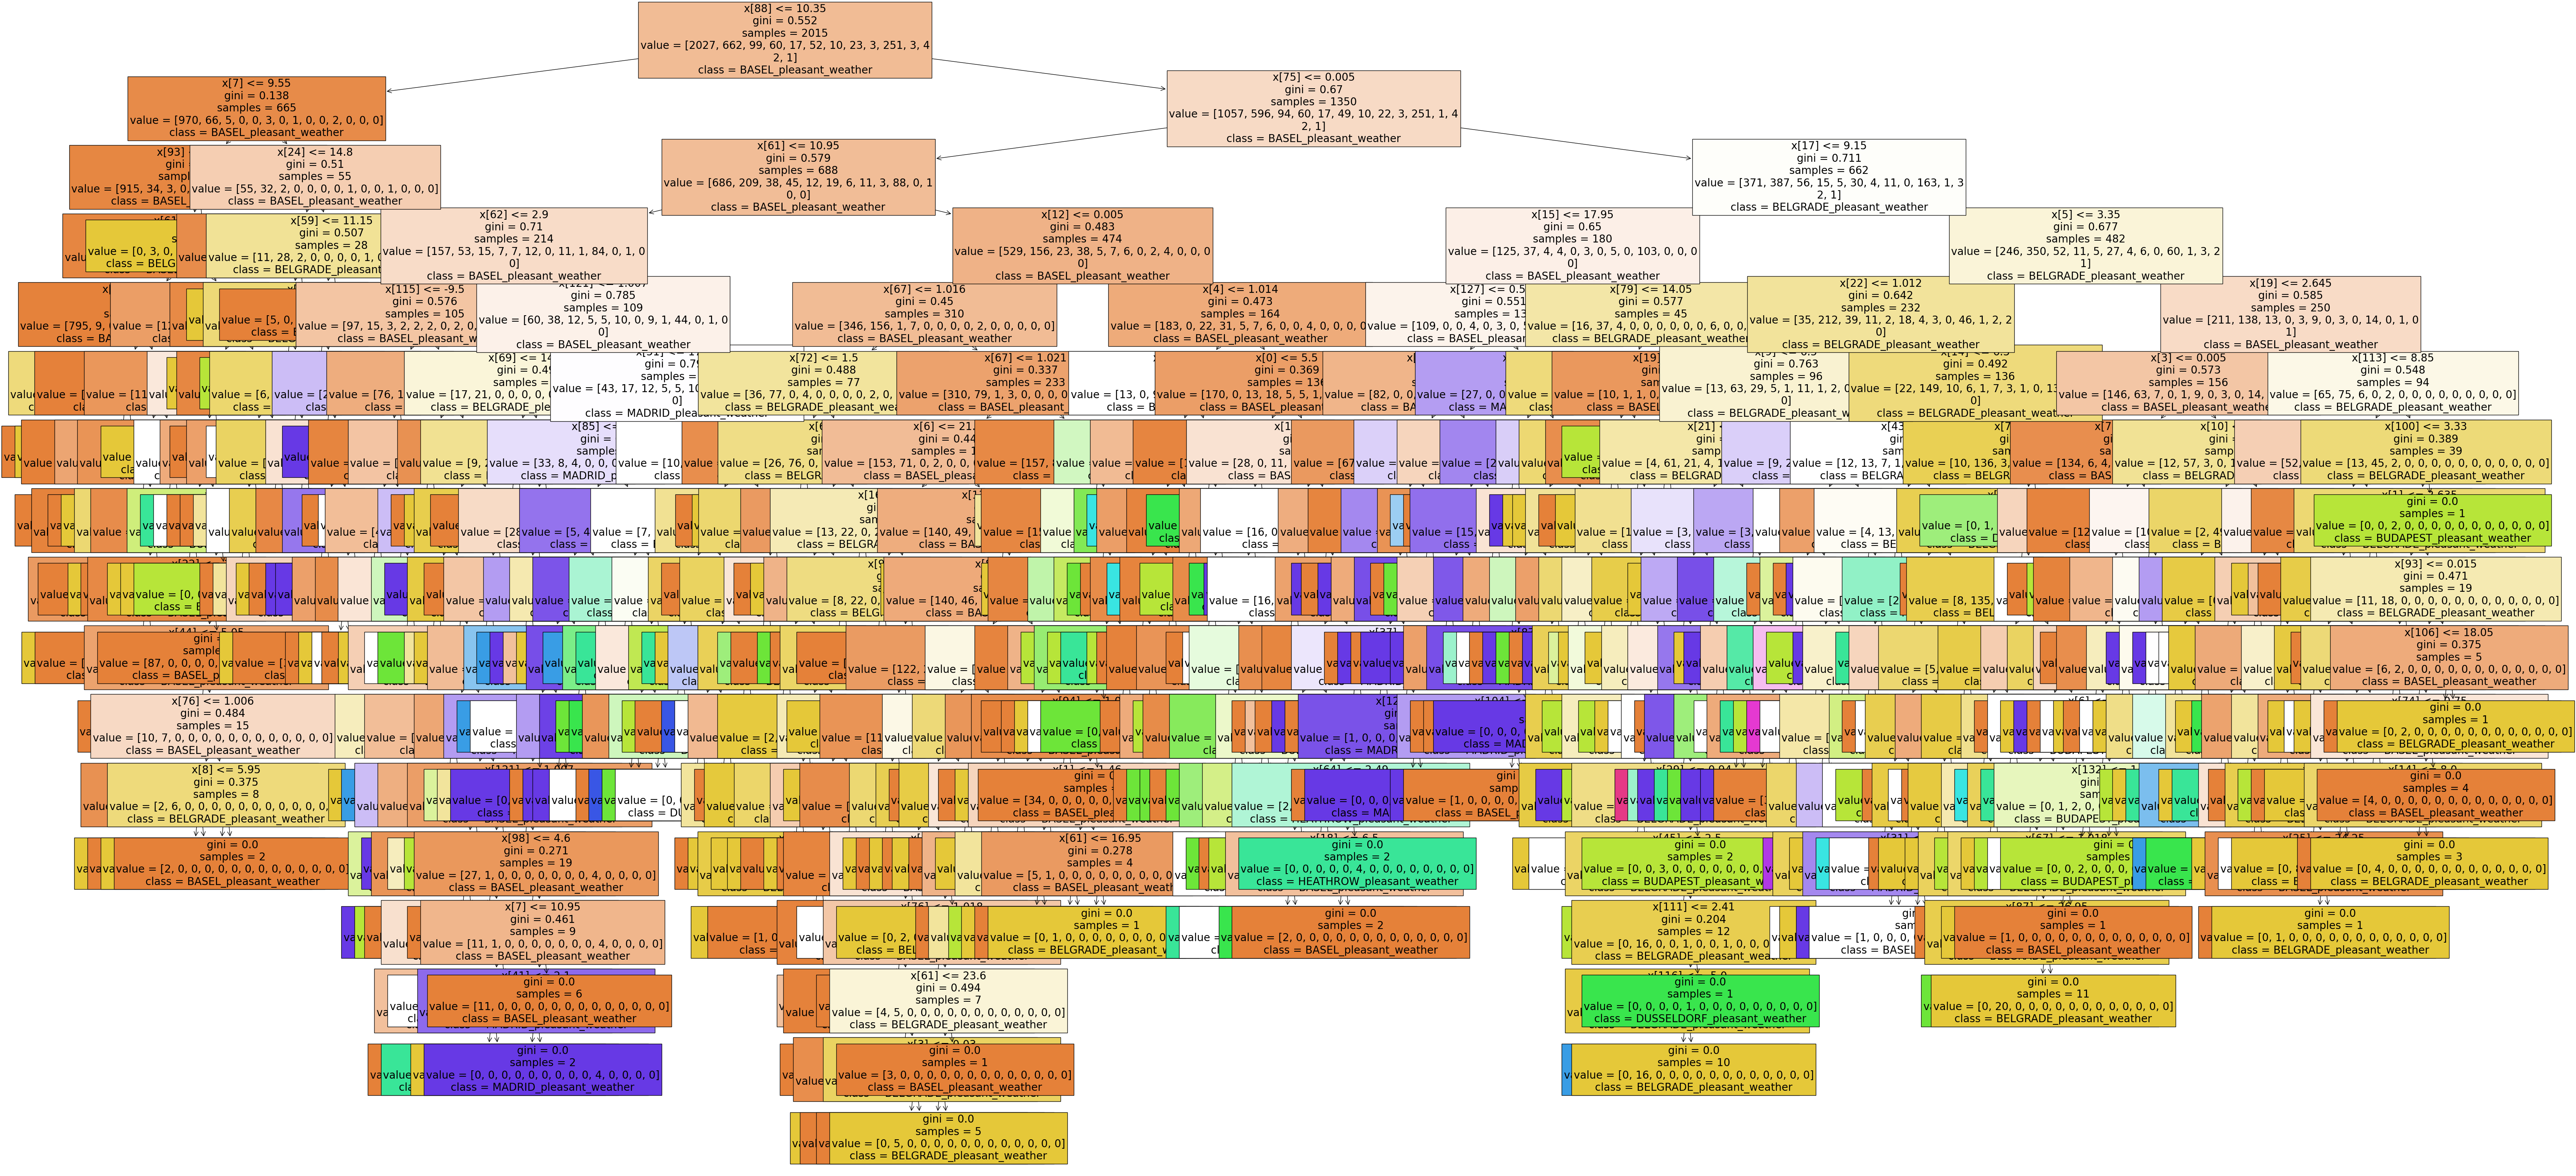

In [33]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[99], fontsize = 20, class_names=weather_outcomes, filled=True);

---------------------------------------------------------------------------------------------------------------------------
## 7. Conduct feature importances analysis

In [34]:
#np.set_printoptions(threshold=np.inf)
newarray = clf3.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.01272831, 0.01473976, 0.01076302, 0.07935344, 0.00633912,
       0.02034833, 0.01650596, 0.00855769, 0.00612705, 0.00815359,
       0.01038268, 0.01062885, 0.0324876 , 0.00649214, 0.01056692,
       0.02642582, 0.01550972, 0.0104431 , 0.0036654 , 0.00947887,
       0.00550324, 0.00644059, 0.00575799, 0.006402  , 0.01559002,
       0.01428771, 0.00994784, 0.00256006, 0.00491802, 0.00346269,
       0.0043863 , 0.00602927, 0.0041462 , 0.00684332, 0.00757633,
       0.00414662, 0.00328223, 0.00497268, 0.00346581, 0.00386154,
       0.00711739, 0.00361065, 0.00845235, 0.00666507, 0.00553149,
       0.00172786, 0.00483753, 0.00361021, 0.00242993, 0.00495952,
       0.00353431, 0.00919343, 0.00674116, 0.00500665, 0.00251357,
       0.00550137, 0.00371285, 0.00391603, 0.00636341, 0.00446948,
       0.01299297, 0.01000949, 0.00478772, 0.0027574 , 0.0063663 ,
       0.00564357, 0.00369121, 0.00705226, 0.00510904, 0.01478556,
       0.01469321, 0.00660473, 0.0033813 , 0.00587222, 0.00375

In [ ]:
#np.set_printoptions(threshold=1000)

In [35]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.01272831, 0.01473976, 0.01076302, 0.07935344, 0.00633912,
         0.02034833, 0.01650596, 0.00855769, 0.00612705],
        [0.00815359, 0.01038268, 0.01062885, 0.0324876 , 0.00649214,
         0.01056692, 0.02642582, 0.01550972, 0.0104431 ],
        [0.0036654 , 0.00947887, 0.00550324, 0.00644059, 0.00575799,
         0.006402  , 0.01559002, 0.01428771, 0.00994784],
        [0.00256006, 0.00491802, 0.00346269, 0.0043863 , 0.00602927,
         0.0041462 , 0.00684332, 0.00757633, 0.00414662],
        [0.00328223, 0.00497268, 0.00346581, 0.00386154, 0.00711739,
         0.00361065, 0.00845235, 0.00666507, 0.00553149],
        [0.00172786, 0.00483753, 0.00361021, 0.00242993, 0.00495952,
         0.00353431, 0.00919343, 0.00674116, 0.00500665],
        [0.00251357, 0.00550137, 0.00371285, 0.00391603, 0.00636341,
         0.00446948, 0.01299297, 0.01000949, 0.00478772],
        [0.0027574 , 0.0063663 , 0.00564357, 0.00369121, 0.00705226,
         0.00510904, 0.01478556, 0.0146932

In [36]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.17546269, 0.13109042, 0.07707366, 0.04406883, 0.04695923,
       0.04204058, 0.0542669 , 0.06670328, 0.0488854 , 0.09351215,
       0.06412505, 0.03469828, 0.04839539, 0.03670234, 0.03601581])

In [37]:
important = pd.Series(sumarray, index = weather) #.sort_values(ascending = False)
important

BASEL_         0.175463
BELGRADE_      0.131090
BUDAPEST_      0.077074
DEBILT_        0.044069
DUSSELDORF_    0.046959
HEATHROW_      0.042041
KASSEL_        0.054267
LJUBLJANA_     0.066703
MAASTRICHT_    0.048885
MADRID_        0.093512
MUNCHENB_      0.064125
OSLO_          0.034698
SONNBLICK_     0.048395
STOCKHOLM_     0.036702
VALENTIA_      0.036016
dtype: float64

['BASEL_', 'BELGRADE_', 'BUDAPEST_', 'DEBILT_', 'DUSSELDORF_', 'HEATHROW_', 'KASSEL_', 'LJUBLJANA_', 'MAASTRICHT_', 'MADRID_', 'MUNCHENB_', 'OSLO_', 'SONNBLICK_', 'STOCKHOLM_', 'VALENTIA_']


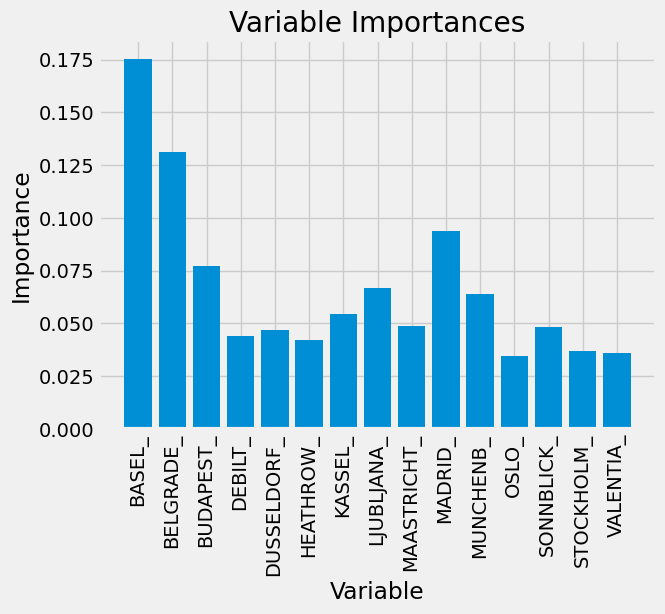

In [38]:
# Conduct variable importances by most influential weather station (broad analysis)
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(weather)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, weather, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

- **Notes:** Basel, Belgrade, and Madrid weather stations still hold the most variable importance (weight) in our random tree prediction model, with an accuracy of 85% rather than 88%.

---------------------------------------------------------------------------------------------------------------------------